#Plotting Sigmoid Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [ ]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [ ]:
sigmoid(1, 0.5, 0)

0.6224593312018546

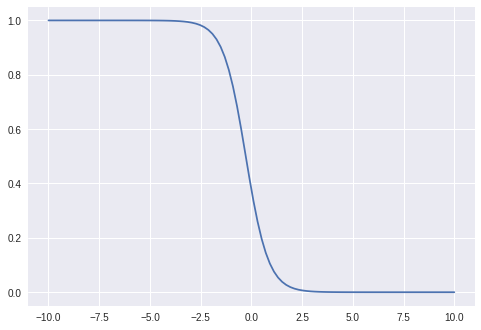

In [ ]:
w = -1.7    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [ ]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [ ]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [ ]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [ ]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

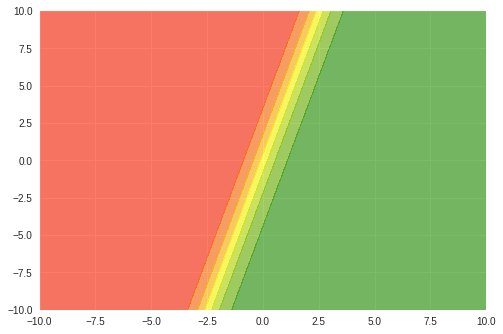

In [ ]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

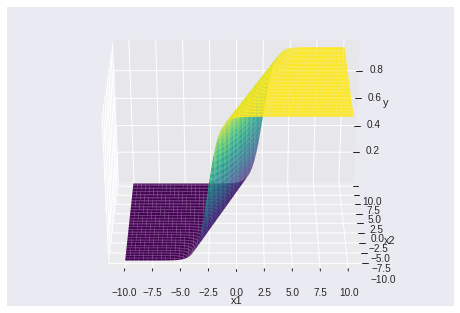

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [ ]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

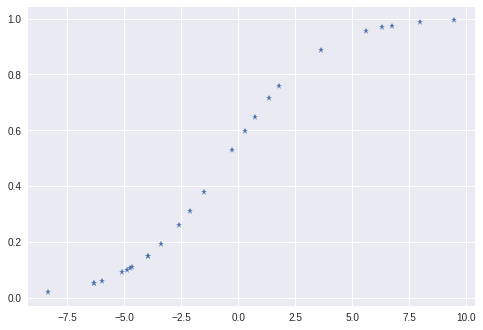

In [ ]:
plt.plot(X, Y, '*')
plt.show()

In [ ]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [ ]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [ ]:
WW.shape

(101, 101)

In [ ]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

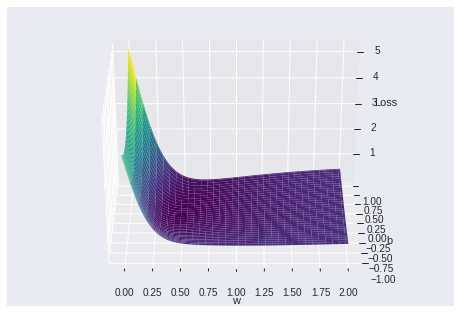

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [ ]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [ ]:
print(i, j)

62 25


In [ ]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [ ]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [ ]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [ ]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [ ]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()


[[-0.52628657  0.97691192]] [0.00162632]



[[-0.310835    0.93341255]] [0.0170269]



[[0.01861057 0.80827491]] [0.02946666]



[[0.55619369 0.54704284]] [0.04645403]



[[0.72808043 0.19409988]] [0.07118515]



[[ 0.78402127 -0.302539  ]] [0.07220534]



[[ 0.91052391 -0.26314253]] [0.00387859]



[[ 0.96984991 -0.36567726]] [-0.06152292]



[[ 1.06840829 -0.31673824]] [-0.11582187]



[[ 1.11110475 -0.40082738]] [-0.16880671]



[[ 1.18590671 -0.37009719]] [-0.21297874]



[[ 1.22597951 -0.42032975]] [-0.2556137]



[[ 1.28005584 -0.41549837]] [-0.29252887]



[[ 1.31962021 -0.43945129]] [-0.3273173]



[[ 1.36092241 -0.44792868]] [-0.35876474]



[[ 1.39729363 -0.46132544]] [-0.38801993]



[[ 1.43185725 -0.47196304]] [-0.41507168]



[[ 1.46403502 -0.48242413]] [-0.44027171]



[[ 1.49430581 -0.49214722]] [-0.46380516]



[[ 1.52283515 -0.50133001]] [-0.48585846]



[[ 1.54980974 -0.51001096]] [-0.50658586]



[[ 1.57538288 -0.51824158]] [-0.52612113]



[[ 1.59968739 -0.52606452]] [-0.54458007]



[[ 1.62283851 -0.53351686]] [-0.56206346]



[[ 1.64493683 -0.54063099]] [-0.57865941]



[[ 1.66607067 -0.54743532]] [-0.59444531]



[[ 1.68631789 -0.55395492]] [-0.60948941]



[[ 1.70574752 -0.56021197]] [-0.62385214]



[[ 1.72442098 -0.56622624]] [-0.63758724]



[[ 1.74239316 -0.57201538]] [-0.65074262]


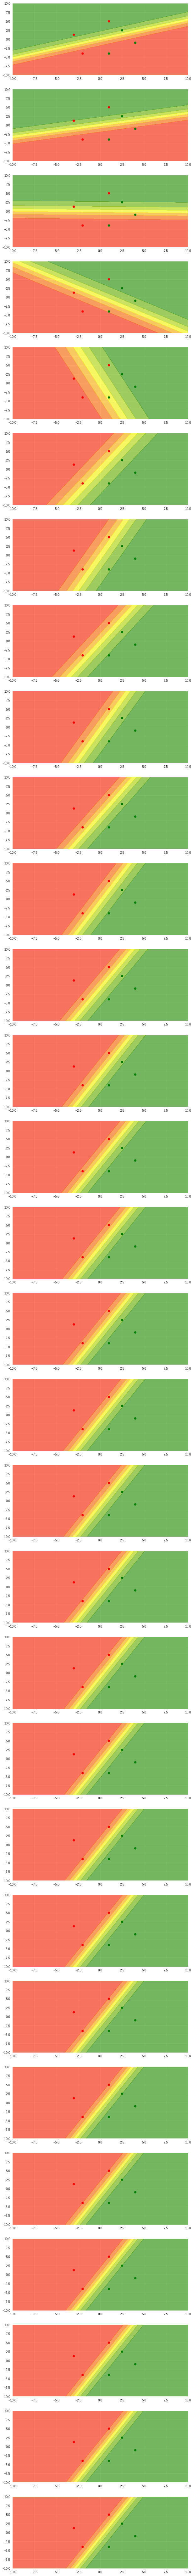

In [ ]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)